<a href="https://colab.research.google.com/github/shallynagfase9/KNN-PCA/blob/main/Dimensionality_Reduction_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment: PCA Implementation
#Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.
#Instructions:
Download the wine dataset from the UCI Machine Learning Repository
Load the dataset into a Pandas dataframe.
Split the dataset into features and target variables.
Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
Implement PCA on the preprocessed dataset using the scikit-learn library.
Determine the optimal number of principal components to retain based on the explained variance ratio.
Visualise the results of PCA using a scatter plot.
Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
Interpret the results of PCA and clustering analysis.
# Deliverables:
Jupyter notebook containing the code for the PCA implementation.
A report summarising the results of PCA and clustering analysis.
Scatter plot showing the results of PCA.
A table showing the performance metrics for the clustering algorithm.
#Additional Information:
You can use the python programming language.
You can use any other machine learning libraries or tools as necessary.
You can use any visualisation libraries or tools as necessary.

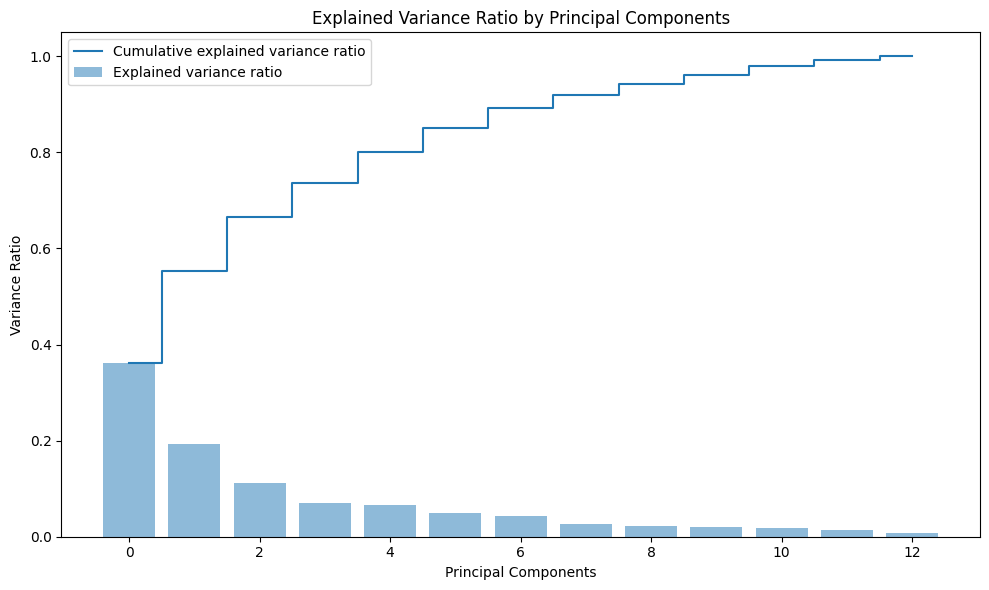

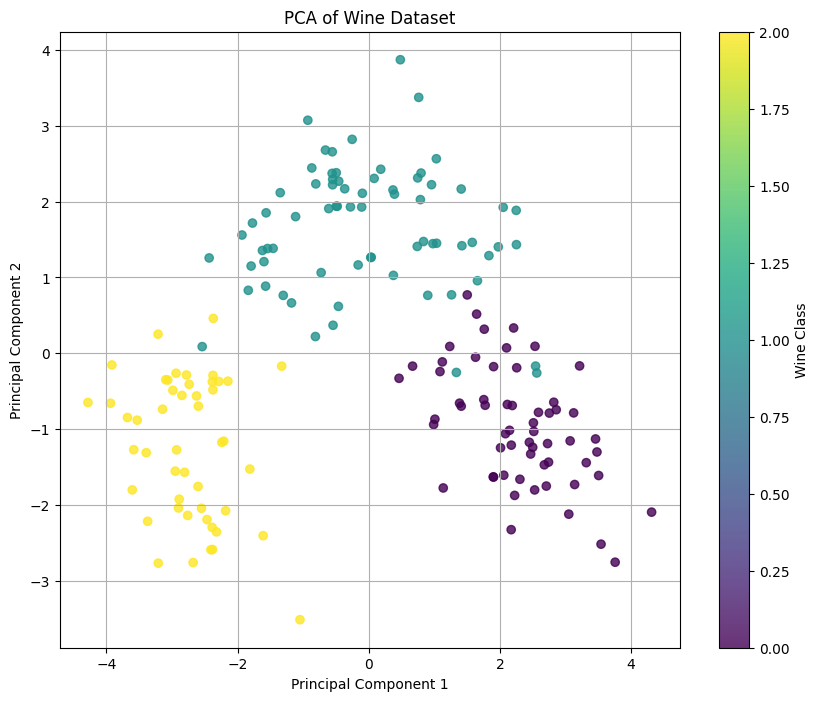

Silhouette Score: 0.5610505693103248


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load Wine dataset
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names

# Convert to DataFrame for easier handling (optional)
df = pd.DataFrame(data=X, columns=feature_names)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Explained variance ratio')
plt.step(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance ratio')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.legend(loc='best')
plt.title('Explained Variance Ratio by Principal Components')
plt.tight_layout()
plt.show()

# Select the number of principal components (example: select 2 for visualization)
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='Wine Class')
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Optional: Perform clustering analysis (example using KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Evaluate clustering performance (example using silhouette score)
silhouette_avg = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

